In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
def makeDisparity(imgL, imgR):
    stereo = cv.StereoBM_create(numDisparities=16, blockSize=15)
    disparity = stereo.compute(imgL,imgR)
    return disparity

In [3]:

def displayVideoRealTime(cap1, cap2):
    ####################################
    #                                  #
    #            NOT FINISHED          #
    #                                  #
    ####################################
    
    if cap1 is None or cap2 is None:
        return
    
#     cap = cap1
#     ret, background = cap.read()
#     background = noiseFiltering( np.flip( np.array(background, dtype=np.uint8), axis = 1 ) )
    
    window_name = "WebCam Video Streaming"
    cv.namedWindow(window_name, flags=cv.WINDOW_AUTOSIZE)
    cv.moveWindow(window_name, 0, 0)
#     window_name1 = "WebCam1 Video Streaming"
#     cv.namedWindow(window_name1, flags=cv.WINDOW_AUTOSIZE)
#     cv.moveWindow(window_name1, 0, 0)
#     window_name2 = "WebCam2 Video Streaming"
#     cv.namedWindow(window_name2, flags=cv.WINDOW_AUTOSIZE)
#     cv.moveWindow(window_name2, 0, 0)
    while True:        
#         if magic_button:
#             cap = cap2
#         else:
#             cap = cap1
        
        ret1, frame1 = cap1.read()
        ret2, frame2 = cap2.read()
        if not ret1 or not ret2:
            break
#         print(frame1.shape, frame2.shape)
        frame1_gray = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)
        frame2_gray = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
        new_shape = tuple(np.minimum(frame1_gray.shape, frame2_gray.shape))
# #         print(frame1_gray.shape, frame2_gray.shape, new_shape)
        frame1_gray = cv.resize(frame1_gray, new_shape[::-1])
        frame2_gray = cv.resize(frame2_gray, new_shape[::-1])
        
        frame1_gray = cv.equalizeHist(frame1_gray)
        frame2_gray = cv.equalizeHist(frame2_gray)
        
#         cv.imshow(window_name1, frame1_gray)
#         cv.imshow(window_name2, frame2_gray)
        
        disparity = makeDisparity(frame1_gray, frame2_gray)
        cv.imshow(window_name, disparity)
        
        key = cv.waitKey(30)
        c = chr(key & 255)
        if c in ['q', 'Q', chr(27)]:
            break
        break
    
    cap1.release()
    cap2.release()
    cv.destroyAllWindows()
    

In [4]:
def testOnCameras():
    if cap1 is None or not cap1.isOpened:
        cap1 = cv.VideoCapture(0)
    if cap2 is None or not cap2.isOpened:
        cap2 = cv.VideoCapture(1)
    print(cap1, cap2)
    displayVideoRealTime(cap1, cap2)

In [5]:
def testOnSampleImages():
    imgL = cv.imread('images/tsukuba_l.png')
    imgR = cv.imread('images/tsukuba_r.png')
    imgL = cv.cvtColor(imgL, cv.COLOR_BGR2GRAY)
    imgR = cv.cvtColor(imgR, cv.COLOR_BGR2GRAY)
    disparity = makeDisparity(imgL, imgR)
    
    fig = plt.figure()
    fig.add_subplot(1, 2, 1)
    plt.imshow(imgL,'gray')
    fig.add_subplot(1, 2, 2)
    plt.imshow(imgR,'gray')
    plt.show()
    plt.imshow(disparity,'gray')
    plt.show()
    return
    window_name = "Test on Sample Images. Tsukuba"
    cv.namedWindow(window_name, flags=cv.WINDOW_AUTOSIZE)
    cv.moveWindow(window_name, 0, 0)
    cv.imshow(window_name, disparity)
    cv.waitKey(0)

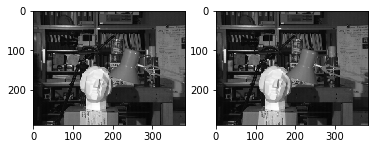

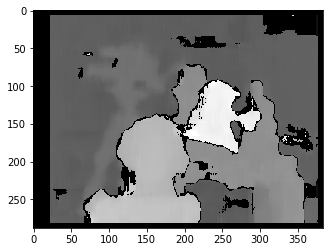

In [6]:
testOnSampleImages()